## Machine Learning Lifecycle

For every machine learning project, a standard methodology is usually applied to ensure successful completion, known as CRISP-DM (Cross Industry Standard Practice for Data Mining) methodology.

<img src='https://www.researchgate.net/profile/Eivind-Kristoffersen/publication/335699423/figure/fig1/AS:804385391132673@1568791830579/An-enhanced-CRISP-DM-process-model.ppm' width=400>

Note that business understanding phase usually requires the use of Project Charter document for defining business objectives and constraints.

On a more detailed level, the lifecycle of a Machine Learning project is as follows:

1. Data collection
2. Data description/Data dictionary
3. Creating train, validation and test set using optimum parameters
3. Statistical/Graphical Exploratory data analysis on training set
4. Handling missing values if required on all sets separately
5. Handling outliers if required on all sets separately
6. Categorical data encoding on all sets separately
7. Address class imbalance issue for classification problems on training set only
8. Data transformation/deriving new attributes if required on all sets separately
9. Feature scaling on all sets separately
11. Feature selection on all sets separately
12. Model training using various machine learning algorithms
13. Initial model evaluation on training and validation set
14. Hyperparameter tuning to improve results of training and validation set
15. Selection of best machine learning algorithm based on results from hyperparameter tuning
16. Final model evaluation on test set
17. Checking for model overfitting/underfitting using learning curve/bias-variance tradeoff and repeat previous steps if required
18. Checking model assumptions and improve model further if required
19. Saving created model file
20. Determine deployment strategies for model (Live stream/batch/mini-batch)
21. Production deployment and testing
22. Finalizing retraining approach
23. Logging and monitoring (Maintaining audit tables)
24. Dashboard for monitoring and logging reports

Note that training, validation and test set are created before exploratory data analysis is essential to avoid risk of data leakage. Ideally, machine learning models should not have any information related to the validation or test set for robustness. Validation set is used for improving model performance when selecting between multiple machine learning algorithms.

## Fundamentals of Machine Learning

There are various definitions of Machine Learning, as follows but not limited to:

- Machine Learning is the science and art of programming computers to learn from data.


- Machine Learning is the field of study that gives computers the ability to learn without being explicitly programmed - Arthur Samuel, 1959


- Machine learning is a computer program that learns from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E. - Tom Mitchell, 1997

Machine learning is useful for problems that:

1. Existing solutions require lots of fine tuning or defining lots of rules
2. Complex and does not yield a good solution using traditional programming approach
3. Fluctuating environments, where machine learning algorithms can adapt to new data
4. Obtain insights from large amount of data

Examples of Machine Learning applications:
- Analyzing images of products on production line for classifying them
- Detect tumors in brain scan
- Automatically classify news articles using sentiment analysis
- Forecasting future revenue of company
- Transaction fraud detection
- Segmenting clients based on previous purchasing history into different groups for different marketing strategy
- Movie recommendation

Main challenges of Machine Learning:
1. Insufficient quantity of training data
2. Non-representative training data (sampling bias)
3. Poor-quality data (Outliers and missing values)
4. Irrelevant features
5. Overfitting/underfitting training data

## Types of Machine Learning Systems

Machine learning systems can be categorized based on following criterias:

1. <b>Training with human supervision</b>
- Supervised ML
- Unsupervised ML
- Semi-supervised ML
- Reinforcement Learning

2. <b>Training incrementally on the fly with new incoming data</b>
- Online Learning
- Batch Learning

3. <b>Training by comparing new to existing data points or detect patterns in training data for building predictive models.</b>
- Instance-based Learning
- Model-based Learning

### Supervised Learning

In supervised learning, training set provided to the ML algorithm includes desired solutions, known as labels.

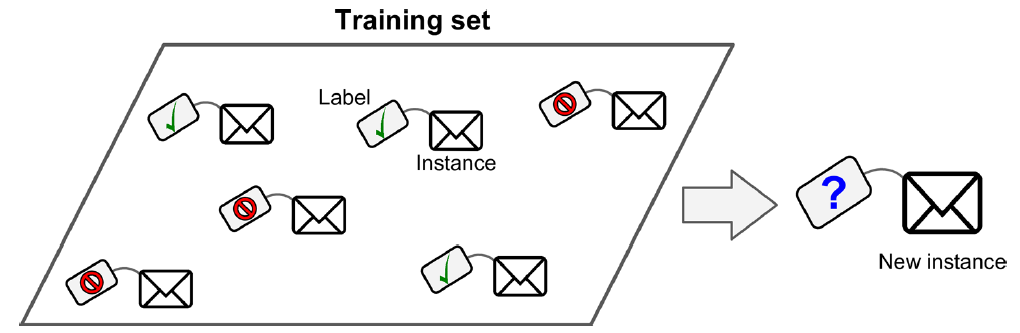

There are two main types of problems that can be solved in supervised learning:
1. Regression (Predicting values from given features)
2. Classification (Predicting class target from given features)

### Unsupervised Learning

In unsupervised learning, training set provided to the ML algorithm without desired solutions. ML algorithm will attempt to derive solution instead.

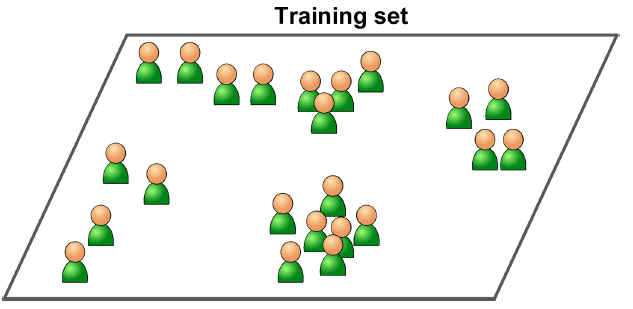

There are four main types of problems that can be solved in unsupervised learning:
1. Clustering
2. Anomaly detection
3. Visualization and dimensionality reduction
4. Association rule learning

### Semi-supervised Learning

In semi-supervised learning, training set provided to ML algorithms are partially labelled, which the ML algorithms are a combination of supervised and unsupervised learning.

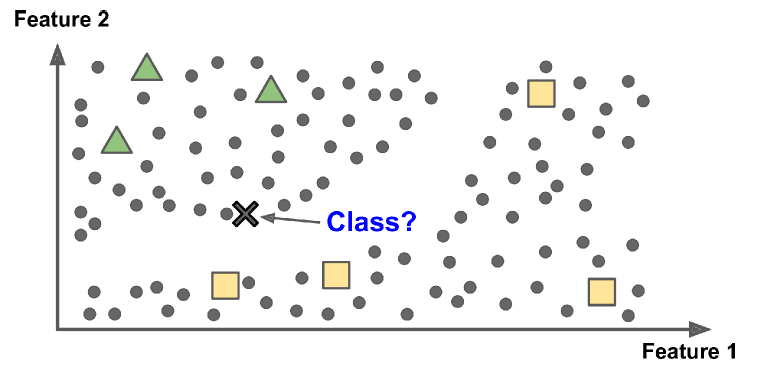

Note that this notebook will not cover further details about ML algorithms related to semi-supervised learning.

### Reinforcement Learning

In reinforcement learning, an agent (learning system) observes the environment, select and perform actions and get rewards/penalties in return. The agent will learn by itself the best strategy (policy) that maximizes rewards over time. 

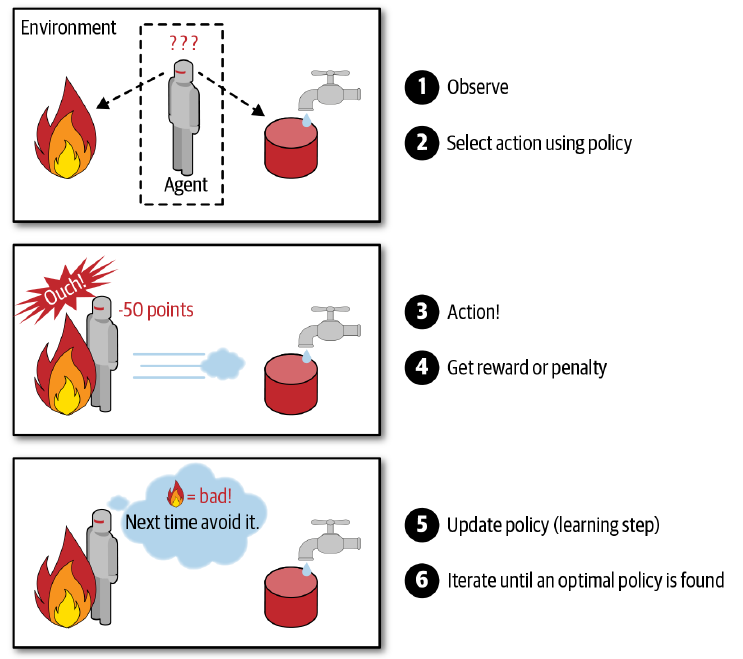

Note that this notebook will not cover further details about ML algorithms related to reinforcement learning.

### Online Learning

In online learning, the ML algorithm is trained incrementally by feeding data instances sequentially. Every learning step is fast and cheap, so that the ML algorithm can learn new information about incoming data on the fly.

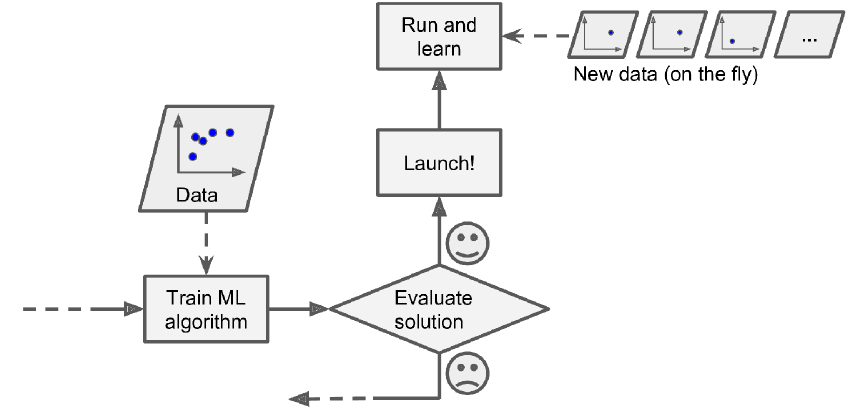

Online learning is suitable for the following scenarios:
1. Data receiving in continuous flow
2. Limited computing resources
3. Training on large datasets that could not fit into a machine's memory (Out-of-core learning)

Determining learning rate is essential in online learning, as large learning rate may result in old data being removed or small learning rate may result in algorithm less sensitive to noise and outliers.

### Batch Learning

In batch learning, the system must be trained using all available data, which is typically done offline (also known as offline learning). When there is new incoming data, the entire system needs to be retrained offline and replace it with the old system.

Fortunately, the entire process of retraining an entire system can be easily automated as shown below with the help of MLOps:

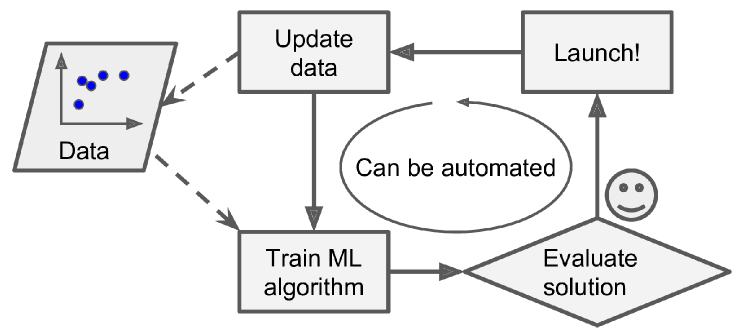

Batch learning is suitable for the following scenarios:
1. Huge computing resources
2. Smaller amount of data

### Instance-based Learning

In instance-based learning, the ML algorithm learns the examples by heart and generalizes to new cases using a measure of similarity to compare them to the learned examples.

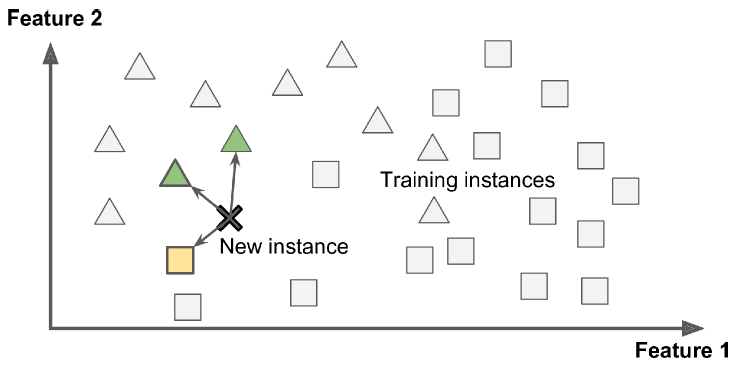

### Model-based Learning

In model-based learning, the ML algorithm is trained on the examples with the help of a model and the model is used to make predictions.

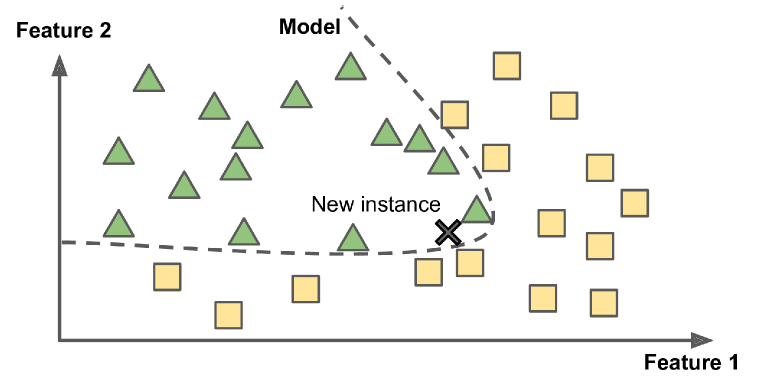

## Issue of Multicollinearity

Multicollinearity indicates having high correlation between multiple independent variables.

Multicollinearity in ML models introduce several issues:

1. Redundancy of having 2 variables or more conveying the same information
2. Dummy variable trap (For categorical data, N-1 categories out of N categories are converted to binary variable)
3. Increase risk of model overfitting

Methods to detect multicollinearity:
1. <b>Correlation heatmap</b> (Very strong correlation (>0.8) for specific variables indicate issue of multicollinearity)
2. <b>Variance Inflation Factor</b> (Measures how much variance of an independent variable is influenced by its interaction with other independent variables - Very high VIF value (>5) for specific variables indicate issue of multicollinearity)

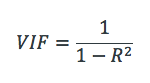

Methods to handle multicollinearity:
1. Ignore if value is not extreme or variable is not used in model
2. Remove variable
3. PCA (Principal Component Analysis - More details in later section)
4. Combine correlated variables to derive new feature

## Validation vs Test set

For model evaluation, the entire dataset is usually split into training set and test set prior to exploratory data analysis to reduce the risk of data leakage (unseen information becomes known to the model)

By evaluating model performance on the test set, this provides an estimation of generalization error of the model on unseen data.

The common threshold for splitting between training set and test set is 80:20. However, very large datasets can be split using a smaller threshold for test set (i.e. 90:10 etc.), such that the test set is sufficiently large enough to provide a good estimate of the generalization error.

However, there is an issue related to the estimate of generalization error when comparing between different ML algorithms, such that performing hyperparameter tuning to obtain the best model for the test set may result in the model unlikely to perform well on new data in production.

A common solution to this issue is by using a holdout-validation set, which is used for selecting the best model from various sets of hyperparameters.

Note that the common threshold for splitting between training, validation and test set is 60:20:20. However, this ratio can change depending on the volume of the dataset.

Extra caution is required on the volume of validation set, as having very large validation set results in much smaller training set, which is not ideal for comparing different models trained on very small training set. Meanwhile, having very small validation set result in model evaluations to be imprecise.

## Bias Variance Tradeoff

Total error of any given supervised machine learning model usually comprises of three main components:
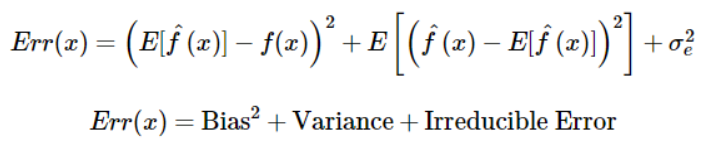


1. <b>Bias error</b>: Difference between average prediction of model and its correct value. (Related to training error)
- Phenomenon that skews result of algorithm in favor or against an idea

2. <b>Variance</b>: Variability of model prediction for a given data point (Related to validation/test error)
- Changes in model when using different portion of training or test data

3. <b>Irreducible error</b>: Noise that the model could not explain

Ideally, ML algorithms should not result in model underfitting or model overfitting. When a model overfits, the model performance will usually have low training errors, but having high test errors.

When a model underfits, the model performance will usually have both high training errors and test errors.

The goodness of fit of models can be represented as a bias-variance tradeoff, where high bias indicates model underfitting and high variance indicates model overfitting.

Possible solutions to high bias:
1. Add additional features that are relevant
2. Add polynomial features
3. Decrease model regularization with hyperparameter tuning

Possible solutions to high variance:
1. Add more training data
2. Reduce number of features used for model training.
3. Reduce noise in training data by either fixing data points or removing outliers
4. Increase model regularization with hyperparameter tuning

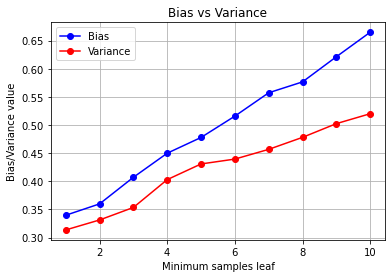

In [1]:
# Bias-variance curve tradeoff
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

digit = load_digits()
X, y = digit.data, digit.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

out = pd.DataFrame(columns = ['MSE', 'Bias^2', 'Variance'])
for min_samples_leaf in list(range(1, 11)):
    model = RandomForestClassifier(min_samples_leaf = min_samples_leaf)
    mse, bias, variance = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss = 'mse')
    out.loc[min_samples_leaf, 'Bias^2'] = bias
    out.loc[min_samples_leaf, 'Variance'] = variance
    out.loc[min_samples_leaf, 'MSE'] = mse
min_samples_leaf = list(range(1, 11))
plt.plot(min_samples_leaf, out['Bias^2'], 'o-', color="b")
plt.plot(min_samples_leaf, out['Variance'], 'o-', color="r")
plt.legend(('Bias', 'Variance'), loc='best')
plt.xlabel("Minimum samples leaf")
plt.ylabel("Bias/Variance value")
plt.title("Bias vs Variance")
plt.grid()
plt.show()

## Learning Curve

Learning curve shows the relationship of training score vs cross validated test score for an estimator with a varying number of training samples, which helps to identify bias-variance tradeoff.

<img src= "https://zahidhasan.github.io/images/learning_curve3.png">

<img src = "https://zahidhasan.github.io/images/learning_curve4.png">

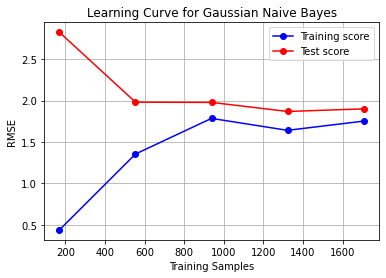

In [2]:
# Learning curve analysis
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB

digit = load_digits()
X, y = digit.data, digit.target

model = GaussianNB()

train_size, train_score, test_score = learning_curve(estimator=model, X=X, y=y, cv=20, scoring='neg_root_mean_squared_error')
train_score_m = np.mean(np.abs(train_score), axis=1)
test_score_m = np.mean(np.abs(test_score), axis=1)

plt.plot(train_size, train_score_m, 'o-', color="b")
plt.plot(train_size, test_score_m, 'o-', color="r")
plt.legend(('Training score', 'Test score'), loc='best')
plt.xlabel("Training Samples")
plt.ylabel("RMSE")
plt.title("Learning Curve for Gaussian Naive Bayes")
plt.grid()
plt.show()

## Gradient Descent Algorithm

Gradient descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. 

The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

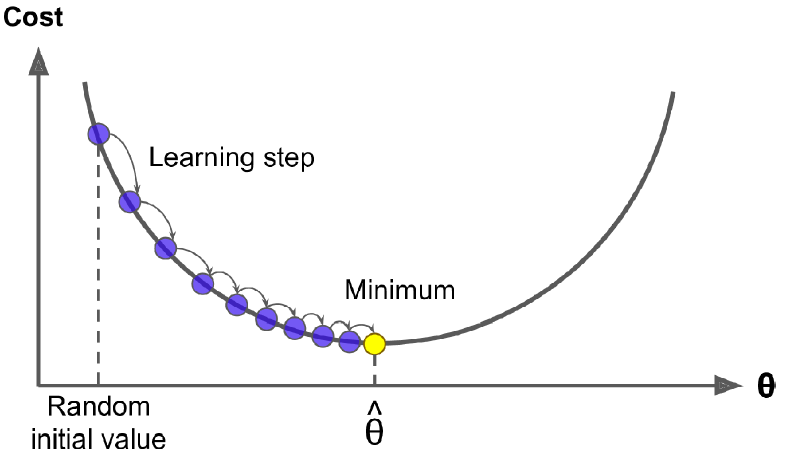

Weights are randomly initialized between negative infinity to positive infinity.

For subsequent iterations, weights are updated iteratively using backpropagation algorithm (more details in Deep Learning):

<img src='https://cdn-images-1.medium.com/max/552/1*FLCxYRTq1GU2AawqV8P8Og.jpeg' width=300>

An important parameter in gradient descent is the size of the steps, determined by the <b>learning rate</b> hyperparameter (eta - η). 

- Learning rate too small: Many iterations required to converge, increasing computation time.

- Learning rate too large: Value of cost function might diverge from local minimum.

Three main challenges of Gradient Descent:
1. Issue of local minima and saddle points (Difficult to reach global minima)
2. Learning rate value (Bouncing ball problem)
3. Same learning rate used to update all weights of cost function (might be unrealistic as different features have different value of importance)

Note that ML algorithms that uses gradient descent requires feature scaling to reduce computation time for models to minimize cost function.

Iteration vs Epoch:
- Iteration: Number of times weights updated
- Epoch: Number of times entire training set is used to update weights

In gradient descent algorithm, there are three different forms of gradient descent:
1. Batch Gradient Descent
2. Stochastic Gradient Descent
3. Mini-Batch Gradient Descent

### Batch Gradient Descent

Gradient descent is performed on the entire dataset for 1 iteration per epoch

Advantages:
- More stable convergence and error gradient than Stochastic Gradient descent
- Embraces the benefits of vectorization
- A more direct path is taken towards the minimum
- Computationally efficient since updates are required after the run of an epoch

Disadvantages:
- Can converge at local minima and saddle points
- Slower learning since update is performed only after all observations are utilized


Note that for convex cost functions, batch gradient descent with a fixed learning rate will eventually converge to the optimal solution, but it can take O(1/ϵ) iterations to reach the optimum within a range of ϵ. 

Dividing tolerance value by N for more precise solution requires the algorithm to run about N times longer.

In [3]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(random_state=0)
clf.fit(X_train, y_train)
print(f"Number of iterations: {clf.n_iter_}")
print(f"R-squared Score:{clf.score(X_test,y_test)}")

Number of iterations: 43
R-squared Score:0.9388888888888889


### Stochastic Gradient Descent

Gradient descent is performed on one observation at a time for N number of iterations per epoch.

Advantages:
- Only a single observation is being processed at a time, which is easier to fit into memory
- May (likely) to reach near the minimum (and begin to oscillate) faster than Batch Gradient Descent on a large dataset
- Frequent updates create oscillations, which may be helpful for getting out of local minimums.

Disadvantages:
- Value of cost function can move away from global minima due to frequent updates
- Lose the benefits of vectorization, given observations are processsed one at a time
- Computationally expensive, since all resources used for processing one training sample at a time

In [4]:
clf = SGDClassifier(random_state=0)
number_iter = 0
for i in range(0,int(len(X_train))):
    clf.partial_fit(X_train[i:(i+1),:], y_train[i:(i+1)],classes=np.unique(y_train))
    number_iter += clf.n_iter_
print(f"Number of iterations: {number_iter}")
print(f"R-squared Score:{clf.score(X_test,y_test)}")

Number of iterations: 1437
R-squared Score:0.8972222222222223


### Mini-Batch Gradient Descent

Gradient descent is performed on several observations (in batches) at a time for " B batch-size" iteration per epoch

Advantages:
- Convergence is more stable than Stochastic Gradient Descent
- Computationally efficient
- Faster Learning than batch gradient descent since more updates are performed

Disadvantages:
- Hyperparameter tuning on size of mini-batch required

Note that 2^n batch sizes usually provide better performance on model computation time.

In [5]:
clf = SGDClassifier(random_state=0, loss='modified_huber')
number_iter = 0
for i in range(0,int(len(X_train)/10)):
    clf.partial_fit(X_train[i*10:(i+1)*10,:], y_train[i*10:(i+1)*10],classes=np.unique(y_train))
    number_iter += clf.n_iter_
print(f"Number of iterations: {number_iter}")
print(f"R-squared Score:{clf.score(X_test,y_test)}")

Number of iterations: 143
R-squared Score:0.8277777777777777


## Evaluation Metrics for Regression

For regression problems, the following metrics can be used to evaluate model performance between train, validation and test set:

1. Mean squared error (MSE)
2. Root mean squared error (RMSE)
3. Mean absolute error (MAE)
4. R-squared (More details in linear regression section)
5. Adjusted R-squared (More details in linear regression section)

### Mean squared error (MSE)

Mean squared error (MSE) represents the squared difference between actual and predicted values.

<img src="https://pbs.twimg.com/media/Etuc3lBXcAEH7wO.png" width=300>

Advantages: Graph of MSE is differentiable, which can be used as a loss function

Disadvantages:
- Not consistent unit of measure with output, which is less interpretable
- Not robust to outliers

### Root mean squared error (RMSE)

Root mean squared error (RMSE) represents a simple square root of mean squared error (MSE).

Advantages: Consistent unit of measure with output variable, which is interpretable

Disadvantages: Not robust to outliers

### Mean absolute error (MAE)

Mean absolute error (MAE) represents the absolute difference between actual and predicted values.

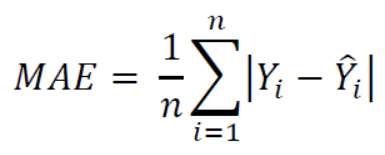

Advantages:
- Consistent unit of measure with output variable, which is interpretable
- Very robust to outliers

Disadvantages: Graph of MAE is not differentiable, which requires use of optimizers like gradient descent algorithm

## Evaluation Metrics for Classification

For classification problems, the following metrics can be used to evaluate model performance between train, validation and test set:
1. Accuracy
2. Precision
3. Recall/Sensitivity/True Positive rate
4. Specificity/True Negative rate
5. False positive rate/Type I error
6. False negative rate/Type II error
7. F1 score
8. Area under curve (AUC)
9. Cohen Kappa
10. Matthew's Correlation Coefficient
11. Log Loss

Note that metrics 1 to 7 can be obtained from the confusion matrix/classification report.

For multiclass classification, there are three different averaging techniques:

1. macro: Simple arithmetic mean of all metrics across classes, suitable for <b>balanced classes</b>
2. weighted: Average of binary metrics weighted by the number of samples of each class, suitable for <b>imbalanced classes</b>
3. micro: Dividing the sum of the diagonal cells of the matrix by the sum of all the cells (Same as accuracy metric) 

In [6]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
def cf_matrix_plot(cf_matrix, labeled):
    """
        Plots a confusion matrix for binary classification problem using heatmaps.
    """
    group_counts = [f"{value}" for value in cf_matrix.flatten()]
    group_percentages = [f"{value:.2f}%" for value in cf_matrix.flatten()/np.sum(cf_matrix)*100]
    labels = [f"{v2}\n{v3}" for v2, v3 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(10,10)
    plt.figure(figsize=(15,8))
    sns.heatmap(cf_matrix, annot=labels, fmt='', xticklabels=labeled,yticklabels=labeled)
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    plt.show()

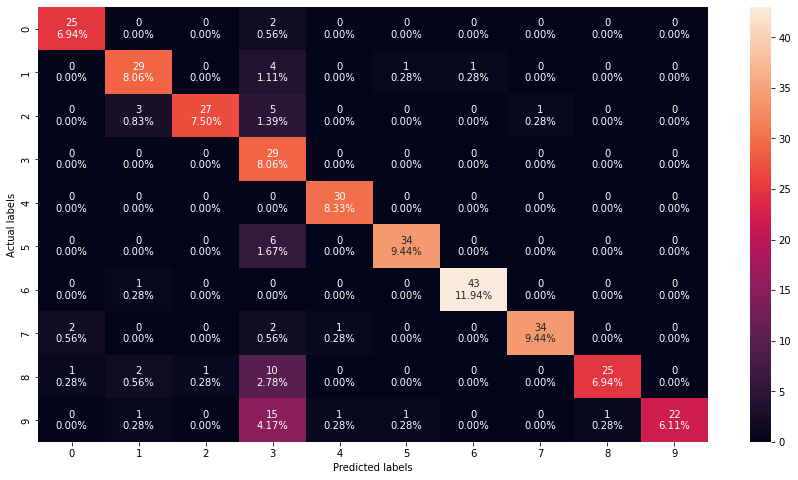

In [7]:
# Confusion matrix heatmap
y_pred = clf.predict(X_test)    
cf_matrix = confusion_matrix(y_test,y_pred)
cf_matrix_plot(cf_matrix,[0,1,2,3,4,5,6,7,8,9])

In [8]:
# Classification report
print(classification_report(y_test,y_pred,digits=6))

              precision    recall  f1-score   support

           0   0.892857  0.925926  0.909091        27
           1   0.805556  0.828571  0.816901        35
           2   0.964286  0.750000  0.843750        36
           3   0.397260  1.000000  0.568627        29
           4   0.937500  1.000000  0.967742        30
           5   0.944444  0.850000  0.894737        40
           6   0.977273  0.977273  0.977273        44
           7   0.971429  0.871795  0.918919        39
           8   0.961538  0.641026  0.769231        39
           9   1.000000  0.536585  0.698413        41

    accuracy                       0.827778       360
   macro avg   0.885214  0.838118  0.836468       360
weighted avg   0.899514  0.827778  0.839713       360



### Accuracy

Accuracy measures how often a classifier correctly predicts a given outcome.

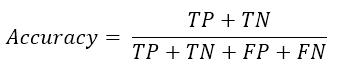

<b>Suitability to use for imbalanced classes: No</b>

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8277777777777777

### Precision

Precision measures the number of actual positives from total number of predicted positive outcome.

Precision is most suitable to use for focusing on reducing false positives.

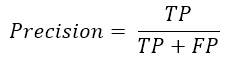

In [10]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred,average='weighted')

0.8995136472904739

### Recall/Sensitivity/True positive rate

Recall measures the number of predicted positives from total number of actual positive outcome.

Recall is most suitable to use for focusing on reducing false negatives.
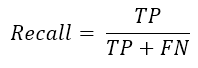

In [11]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred,average='weighted')

0.8277777777777777

### Specificity/True negative rate

Specificity measures the number of predicted negatives from total number of actual negative outcome.

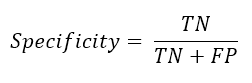

### False positive rate/Type I error

False positive rate/Type I error represents the proportion of false positives from total number of actual negative outcome.

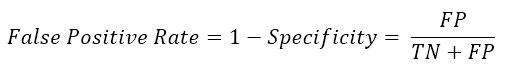

### False negative rate/Type II error

False negative rate/Type II error represents the proportion of false negatives from total number of actual positive outcome.

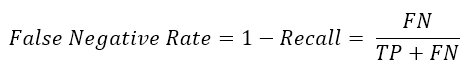

### F1 score

F1 score represents the harmonic mean between both precision and recall.

F1 score is most suitable to use when both precision and recall metrics have equal importances.

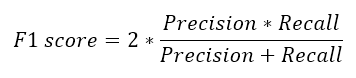

Note that F1 score is maximized when precision equals to recall.

<b>Suitability to use for imbalanced classes: Yes</b>

In [12]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred, average='weighted')

0.8397130281698492

### Area under curve (AUC)

Area under curve (AUC) measures the ability of a classifier to distinguish between classes.

Note that this metric is only used with classifiers that can generate <b>class probabilities</b>.

<b> Suitability to use for imbalanced classes: No</b>

In [13]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,clf.predict_proba(X_test),multi_class='ovo',average='weighted')

0.9489935716046531

### Cohen Kappa Score

Cohen Kappa score measures inter-rater reliability for categorical items, which accounts possibility of agreement between actual and predicted values occuring by chance.

This metric can be used for multi-class classification problems.

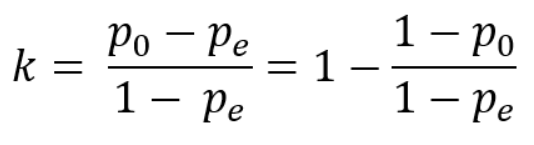

P_0 is the observed proportional agreement between actual and predicted values (sum of diagonal cells of confusion matrix divided by sum of non-diagonal cells).

P_e is the probability that both actual and predicted values are true by chance.

Cohen Kappa value interpretation:

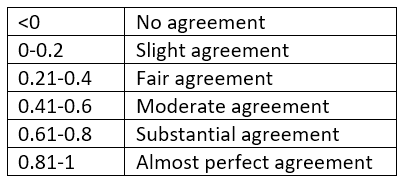

<b> Suitability to use for imbalanced classes: Yes </b>

In [14]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,y_pred)

0.8089728008763971

### Matthew's Correlation Coefficient

Matthew's correlation coefficient (phi) measures the quality of binary and multiclass classifications. 

A score of 1.0 means a perfect classifier, while a value close to 0 means classifier is no better than random chance.

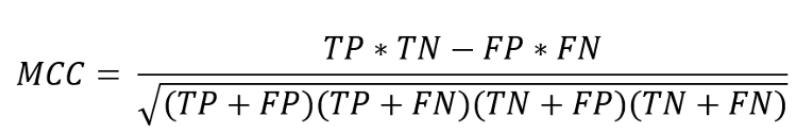

Note that coefficient values above 0.7 are generally considered as good scores.

<b> Suitability to use for imbalanced classes: Yes </b>

In [15]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test,y_pred)

0.8179807549416931

### Log-Loss

Log-loss, also known as cross-entropy loss represents the value of a loss function.

Generally, the lower the value of log-loss, the better the performance of the classifier.

<b>Suitability to use for imbalanced classes: No</b>

In [16]:
from sklearn.metrics import log_loss
log_loss(y_test, clf.predict_proba(X_test))

3.1836336911546104

## Optimum Threshold for Classification Problems

By default, all ML classification algorithms assume the threshold used for selecting a class is 0.5. However, this default threshold is not always optimal for model performance.

Thus, determining optimal thresholds for a binary classification task depends on business context with the help of several tools available.

For determining optimal thresholds of binary classification task:

- <b>ROC curves</b> should be used when target classes are balanced

- <b>Precision-recall curves</b> should be used when target classes are imbalanced.

ROC curve represents the relationship between true positive rate (Recall) and false positive rate (Type I error) for different threshold values.

Precision recall curve represents the relationship between precision and recall for different threshold values.

Methods for optimum threshold using ROC curves:
- G-mean (Geometric mean between recall and specificity)
- Youden's J statistic (Difference between true positive rate and false positive rate)

Methods for optimum threshold using precision-recall curves:
- F1 score

Note that both ROC and Precision-recall curve is strictly related for binary classification tasks only.

In [17]:
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.linear_model import LogisticRegression
y_train_7 = (y_train == 7)
y_test_7 = (y_test == 7)
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train_7)

LogisticRegression(max_iter=10000)

In [18]:
def binary_cf_matrix_plot(cf_matrix, label=[0,1]):
    """
        Plots a confusion matrix for binary classification problem using heatmaps.
    """
    group_names = ['True Negative','False Positive','False Negative','True Positive']
    group_counts = [f"{value}" for value in cf_matrix.flatten()]
    group_percentages = [f"{value:.2f}%" for value in cf_matrix.flatten()/np.sum(cf_matrix)*100]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot=labels, fmt='', xticklabels=label,yticklabels=label)
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    plt.show()

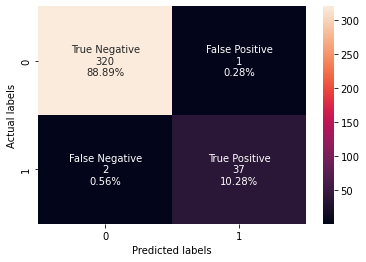

In [19]:
# Confusion matrix heatmap for default threshold of 0.5
y_pred = clf.predict(X_test)    
cf_matrix = confusion_matrix(y_test_7,y_pred)
binary_cf_matrix_plot(cf_matrix)

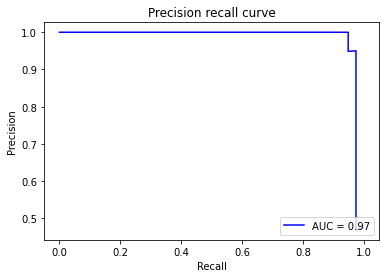

In [20]:
# Plot precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test_7, clf.predict_proba(X_test)[:,1])
plt.title('Precision recall curve')
plt.plot(recalls, precisions, 'b', label = 'AUC = %0.2f' % roc_auc_score(y_test_7, clf.predict(X_test)))
plt.legend(loc = 'lower right')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [21]:
fscore = 2 * (precisions*recalls)/(precisions+recalls)
index = np.argmax(fscore)
print(f"Optimal threshold: {thresholds[index]}")

Optimal threshold: 0.9654725993549834


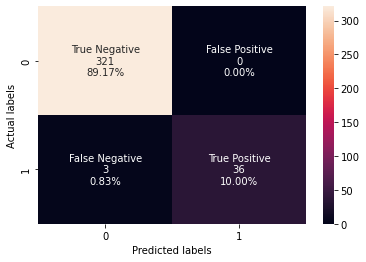

In [22]:
# Confusion matrix heatmap for optimum threshold using f score
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train_7)
y_pred_proba = clf.predict_proba(X_test)[:,1]
y_pred = np.where(y_pred_proba>thresholds[index],1,0)
cf_matrix = confusion_matrix(y_test_7,y_pred)
binary_cf_matrix_plot(cf_matrix)

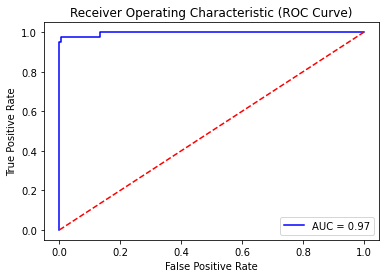

In [23]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test_7, clf.predict_proba(X_test)[:,1])
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_score(y_test_7, clf.predict(X_test)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [24]:
# Optimal threshold determined based on Youden's J statistic
optimal_idx = np.argmax(tpr - fpr)
print(f"Optimal threshold: {thresholds[optimal_idx]}")

Optimal threshold: 0.12520664134422219


In [25]:
# Optimal threshold determined based on G-mean
optimal_idx = np.argmax(np.sqrt(tpr * (1 - fpr)))
print(f"Optimal threshold: {thresholds[optimal_idx]}")

Optimal threshold: 0.12520664134422219


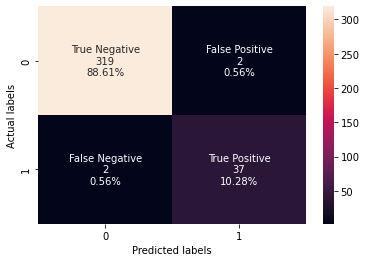

In [26]:
# Confusion matrix heatmap for optimum threshold using Youden's J statistic and G-mean
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train_7)
y_pred_proba = clf.predict_proba(X_test)[:,1]
y_pred = np.where(y_pred_proba>thresholds[optimal_idx],1,0)
cf_matrix = confusion_matrix(y_test_7,y_pred)
binary_cf_matrix_plot(cf_matrix)

## Bagging vs Boosting (Ensemble Techniques)

In machine learning, ensemble techniques can be used to improve performance of weak base learners.

Two main ensemble methods available are:
1. <b>Bagging</b>: Creates several subsets of data from training sample chosen randomly with replacement and trains on individual weak learners parallelly (same or different types) to reduce model overfitting.
- For regression task, <b>average of predictions</b> from all learners are used.
- For classification task, <b>majority voting</b> from all learners are used.

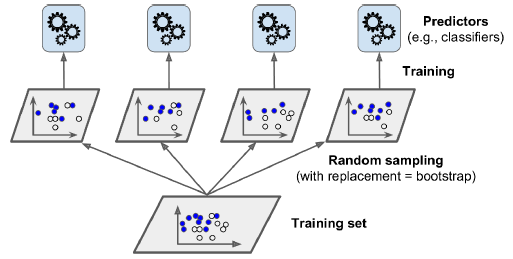

2. <b>Boosting</b>: Individual learners (same types) are learned sequentially with early learners fitting simple models to the data and then analysing data for errors for further model improvement.

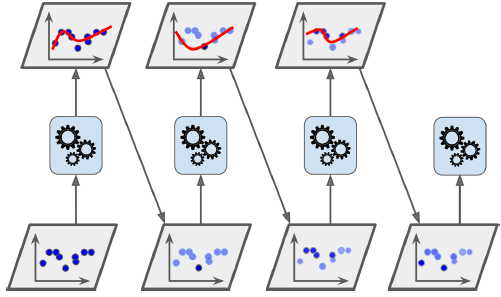

<b>Difference between Bagging and Boosting</b>:

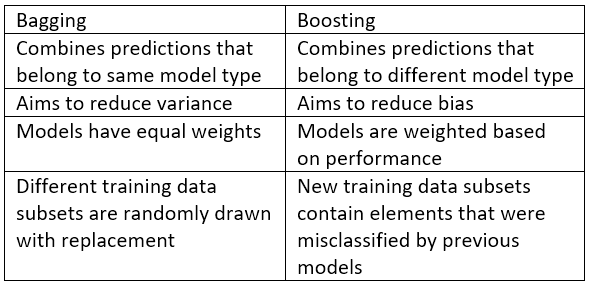